## Setup in Local Machine

In [1]:
#Install
%pip install worker
%pip install pandas
%pip install numpy
%pip install networkx
%pip install matplotlib
%pip install music21
%pip install musescore
%pip install tslearn
%pip install sklearn
%pip install multiprocessing
%pip install pyvis

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

  Using cached multiprocessing-2.6.2.1.tar.gz (108 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [22 lines of output]
      Traceback (most recent call last):
        File "c:\Users\AL\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\AL\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\AL\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\AL\AppData\Local\Temp\pip-build-env-bm_glkwi\overlay\Lib\

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
# Import
import worker
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from music21 import *
from music21 import converter, corpus, environment, note, chord
from tslearn.metrics import dtw
from multiprocessing import Pool, Manager, cpu_count
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import pairwise_distances
from networkx.algorithms.cuts import conductance
from pyvis.network import Network
from IPython.core.display import display, HTML

C:\Users\AL\AppData\Local\Temp\ipykernel_8956\2102315245.py:16: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
# Path
env = environment.Environment()
env['musicxmlPath'] = 'C:\\Program Files\\MuseScore 4\\bin\\MuseScore4.exe' # Change if needed
env['musescoreDirectPNGPath'] = 'C:\\Program Files\\MuseScore 4\\bin\\MuseScore4.exe' # Change if needed

## Process Sample Music

#### Functions

In [5]:
# midi to score array function (contains all data needed for score visualization)
def midi_to_sarr(midi_parsed):
    sarr = []
    for part in midi_parsed.parts:
        for element in part.flatten():
            sarr.append(element)
    return sarr

In [9]:
# sarr to narr and nmat function (removes all elements except notes, rests and chords then turn it into a matrix )
def narr_to_nmat_and_cnarr(score_array):
  trashed_elements = 0
  narr = []
  nmat = pd.DataFrame(columns=['onset_beats', 'duration_beats', 'midi_pitch'])

  for element in score_array:
    if isinstance(element, chord.Chord):
      row = [element.offset, element.duration.quarterLength, element.root().midi]
      nmat.loc[len(nmat)] = row
      narr.append(element)
    elif isinstance(element, note.Rest):
      row = [element.offset, element.duration.quarterLength, 0]
      nmat.loc[len(nmat)] = row
      narr.append(element)    
    else:
      try:
        row = [element.offset, element.duration.quarterLength, element.pitch.midi]
        nmat.loc[len(nmat)] = row
        narr.append(element)
      except:
        trashed_elements += 1
        # print(f"Trashed element #{trashed_elements}:\n{note}") # for debugging
  return nmat, narr

#### Usage

In [21]:
# parse the midi and keep score title
midi_file = 'bach_846.mid' # Hardcoded, for multiple songs, make a function to iterate thru folder
midi_parsed = converter.parse(midi_file)
score_title = midi_file[:-4] # Temporary, apparently the title is not a score element that you can extract so im using the filename

bach_846


In [22]:
# convert parsed midi into a readable array of elements that forms the score
sarr = midi_to_sarr(midi_parsed) # this midi was cleaned

# output sarr to a readable .txt file
with open("sarr_output.txt", "w") as f:
    f.write(f"Number of elements: {len(sarr)}\n\n")
    for element in sarr:
        f.write(f"{element}\n")

In [26]:
# convert score array into a note array and note matrix
nmat, narr = narr_to_nmat_and_cnarr(sarr)

# output nmat to a readable .txt file
with open("nmat_output.txt", "w") as f:
    f.write(f"Number of notes: {len(nmat)}\n\n")
    for note in nmat:
        f.write(f"{note}\n")
    f.write("\n")
    np.savetxt('nmat_output.txt', nmat, delimiter=',', fmt='%s')

# output narr to a readable .txt file
with open("narr_output.txt", "w") as f:
    f.write(f"Number of notes: {len(narr)}\n\n")
    for note in narr:
        f.write(f"{note}\n")

In [ ]:
# EXPERIMENTAL CODE BLOCK
score = converter.parse('bach_846.mid')
# Check if the score has a metadata object
if hasattr(score, 'metadata'):
    # Try to access the title from the metadata
    if 'title' in score.metadata:
        print(score.metadata.title)
    else:
        print("MIDI file does not contain a title in the metadata.")
else:
    print("MIDI file does not contain any metadata.")

## Implication-Realization Ruleset, Assignment and Score Visualization

#### Functions

In [28]:
# IR symbol calculation function
def calculate_ir_symbol(interval1, interval2, threshold=5):
    direction = interval1 * interval2
    abs_difference = abs(interval2-interval1)
    # Process
    if direction > 0 and (abs(interval2-interval1))<threshold:
        return 'P'  
    # IR2: D (Duplication)
    elif interval1 == interval2 == 0:
        return 'D' 
    # IR3: IP (Intervallic Process)
    elif ((interval1 * interval2)<0) and (-threshold <= (abs(interval2) - abs(interval1)) <= threshold) and (abs(interval2) != abs(interval1)):
        return 'IP' 
    # IR4: ID (Intervallic Duplication)
    elif ((interval1 * interval2) < 0) and (abs(interval2) == abs(interval1)):
        return 'ID'   
    # IR5: VP (Vector Process)
    elif (interval1 * interval2 > 0) and (abs(interval2-interval1) >= threshold) and (abs(interval1) <= threshold):
        return 'VP'
    # IR6: R (Reveral)
    elif (interval1 * interval2 < 0) and (abs(abs(interval2)-abs(interval1)) >= threshold) and (abs(interval1) >= threshold):
        return 'R'
    # IR7: IR (Intervallic Reveral)
    elif (interval1 * interval2 > 0) and (abs(abs(interval2)-abs(interval1)) >= threshold) and (abs(interval1) >= threshold):
        return 'IR' 
    # IR8: VR (Vector Reveral)
    elif (interval1 * interval2 < 0) and (abs(interval2 - interval1) >= threshold) and (abs(interval1) <= threshold):
        return 'VR'
    elif interval2 == 0 and not (interval1 < -5 or interval1 > 5):
        return 'IP'
    elif interval2 == 0 and (interval1 < -5 or interval1 > 5):
        return 'R'
    elif interval1 == 0 and not (interval2 < -5 or interval2 > 5):
        return 'P'
    elif interval1 == 0 and (interval2 < -5 or interval2 > 5):
        return 'VR'

In [29]:
# assign IR symbol function (original; modified)
def assign_ir_symbols(score_array):

    symbols = []
    current_group = [] 
    group_pitches = []
    
    color_map = {
        'P': 'blue',        # IR1: P (Process) 
        'D': 'green',       # IR2: D (Duplication)
        'IP': 'red',        # IR3: IP (Intervallic Process)
        'ID': 'orange',     # IR4: ID (Intervallic Duplication)
        'VP': 'purple',     # IR5: VP (Vector Process)
        'R': 'cyan',        # IR6: R (Reveral)
        'IR': 'magenta',    # IR7: IR (Intervallic Reveral)
        'VR': 'yellow',     # IR8: VR (Vector Reveral)
        'M': 'pink',        # IR9: M (Monad)
        'd': 'lime',        # IR10 d (Dyad)
    }

    def evaluate_current_group():
        if len(current_group) == 3:
            interval1 = group_pitches[1] - group_pitches[0]
            interval2 = group_pitches[2] - group_pitches[1]
            symbol = calculate_ir_symbol(interval1, interval2)
            # symbols.append(symbol)
            color = color_map.get(symbol, 'black')  # Default to black if symbol is not predefined
            symbols.extend((note, symbol, color) for note in current_group)
        elif len(current_group) == 2:
            # symbols.append('d')  # Dyad
            symbols.extend((note, 'd', color_map['d']) for note in current_group)
        elif len(current_group) == 1:
            # symbols.append('M')  # Monad
            symbols.extend((note, 'M', color_map['M']) for note in current_group)
        # else:
            # symbols.append('Error: Invalid note object')
        current_group.clear()
        group_pitches.clear()

    for element in score_array:
        if isinstance(element, note.Note):
            current_group.append(element)
            group_pitches.append(element.pitch.ps)
            if len(current_group) == 3:
                evaluate_current_group()
        elif isinstance(element, chord.Chord):
            current_group.append(element)
            group_pitches.append(element.root().ps)
            if len(current_group) == 3:
                evaluate_current_group()
        elif isinstance(element, note.Rest):
            # continue
            # Remove continue for visualization
            rest_tuple = (element, 'rest', 'black') 
            evaluate_current_group()
            symbols.append(rest_tuple)
        else:
            if current_group:
                evaluate_current_group()

    # Handle any remaining notes
    if current_group:
        evaluate_current_group()

    return symbols

In [30]:
# Score visualization function
def visualize_notes_with_symbols(notes_with_symbols):
    s = stream.Score()
    part = stream.Part()
    for note, symbol, color in notes_with_symbols:
        print(note, symbol, color)
        note.style.color = color
        note.lyric = symbol
        part.append(note)
    s.append(part)
    s.show()

#### Usage

<music21.note.Rest eighth> rest black
<music21.note.Note G> P blue
<music21.note.Note C> P blue
<music21.note.Note E> P blue
<music21.note.Note G> P blue
<music21.note.Note C> P blue
<music21.note.Note E> P blue
<music21.note.Rest eighth> rest black
<music21.note.Note G> P blue
<music21.note.Note C> P blue
<music21.note.Note E> P blue
<music21.note.Note G> P blue
<music21.note.Note C> P blue
<music21.note.Note E> P blue
<music21.note.Rest eighth> rest black
<music21.note.Note A> P blue
<music21.note.Note D> P blue
<music21.note.Note F> P blue
<music21.note.Note A> P blue
<music21.note.Note D> P blue
<music21.note.Note F> P blue
<music21.note.Rest eighth> rest black
<music21.note.Note A> P blue
<music21.note.Note D> P blue
<music21.note.Note F> P blue
<music21.note.Note A> P blue
<music21.note.Note D> P blue
<music21.note.Note F> P blue
<music21.note.Rest eighth> rest black
<music21.note.Note G> P blue
<music21.note.Note D> P blue
<music21.note.Note F> P blue
<music21.note.Note G> P blu

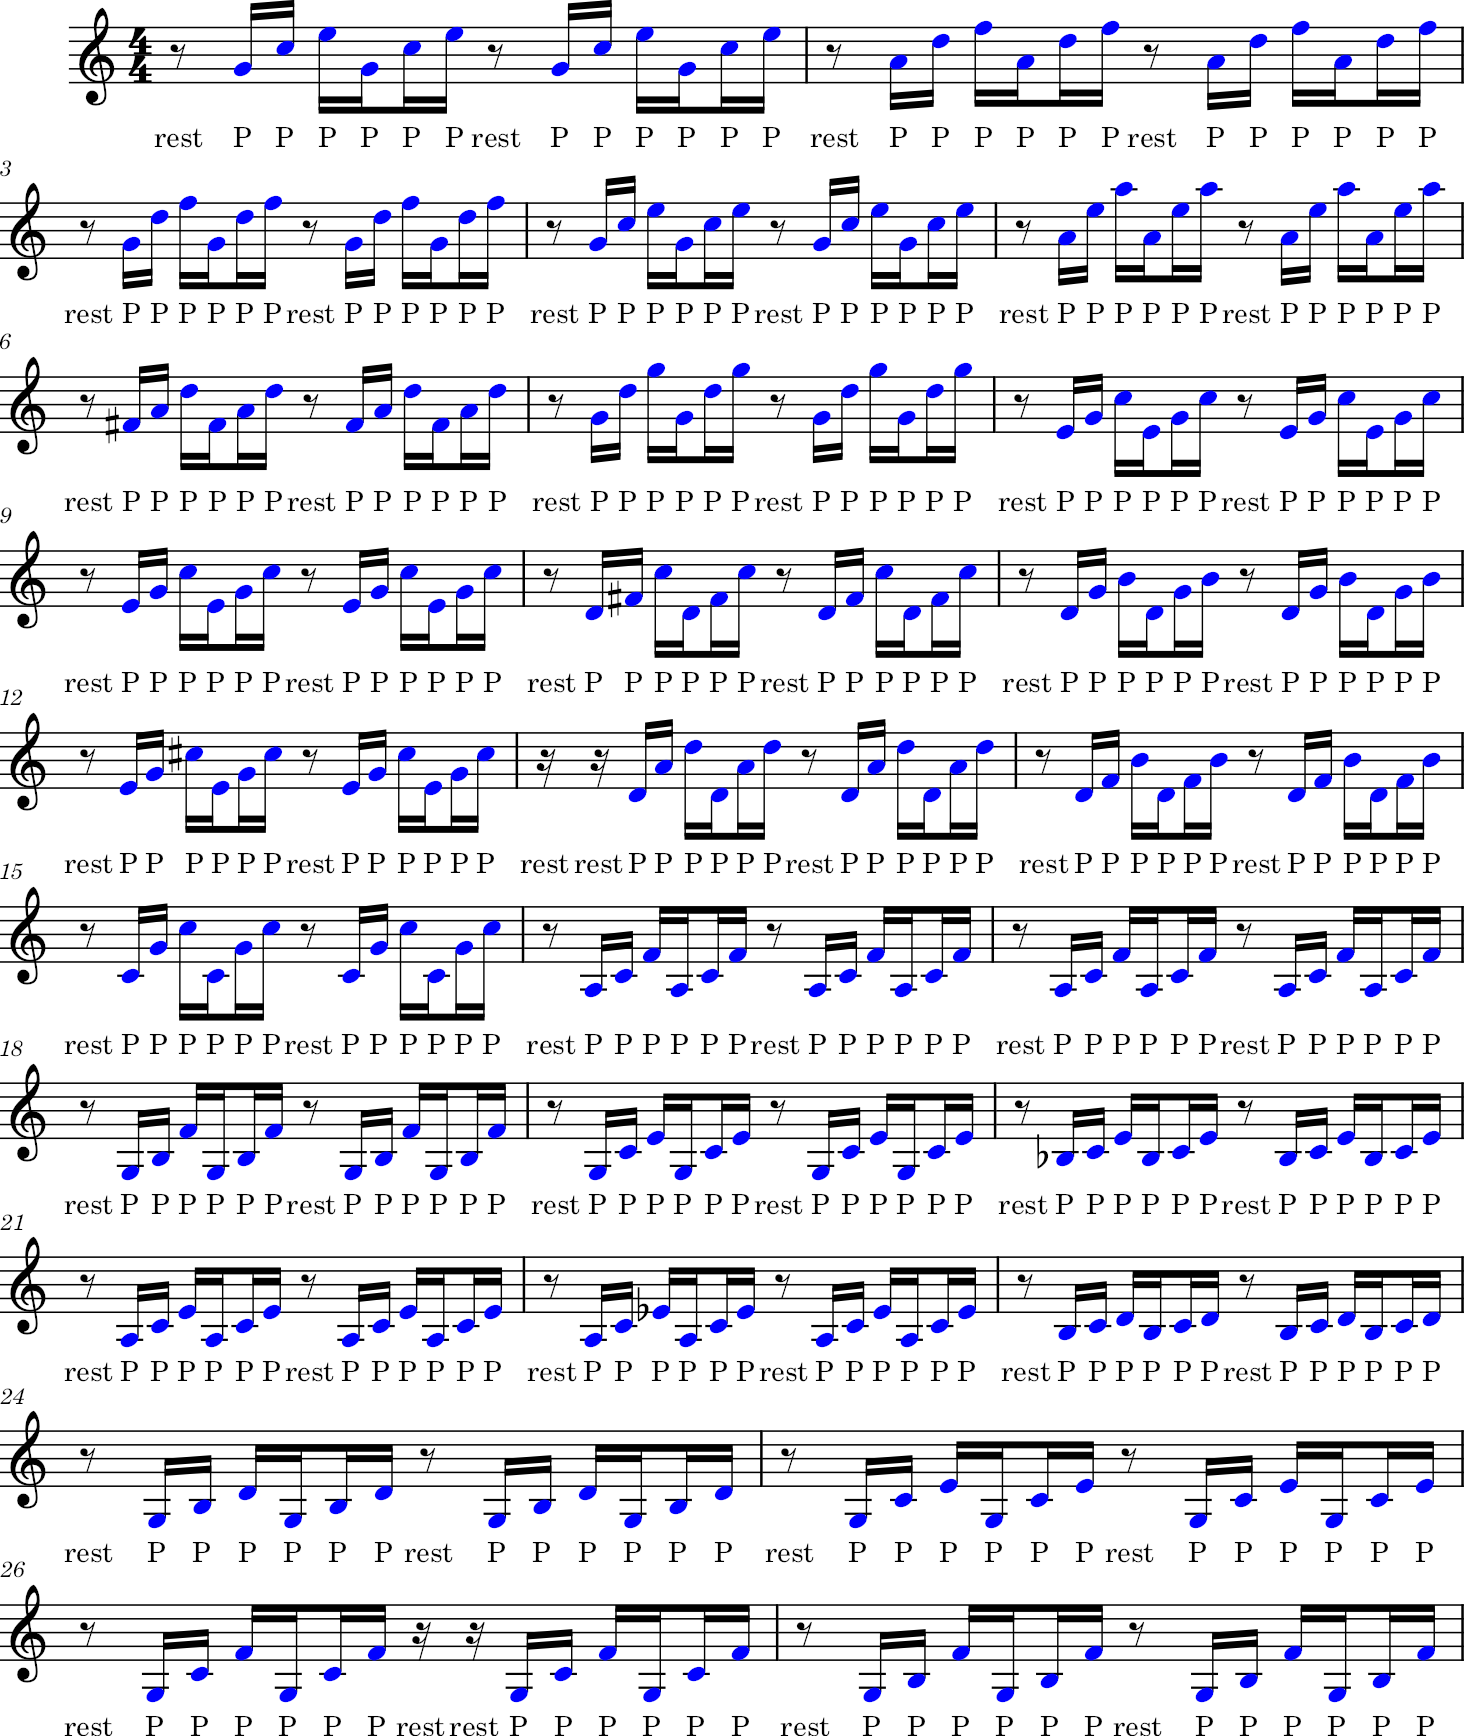

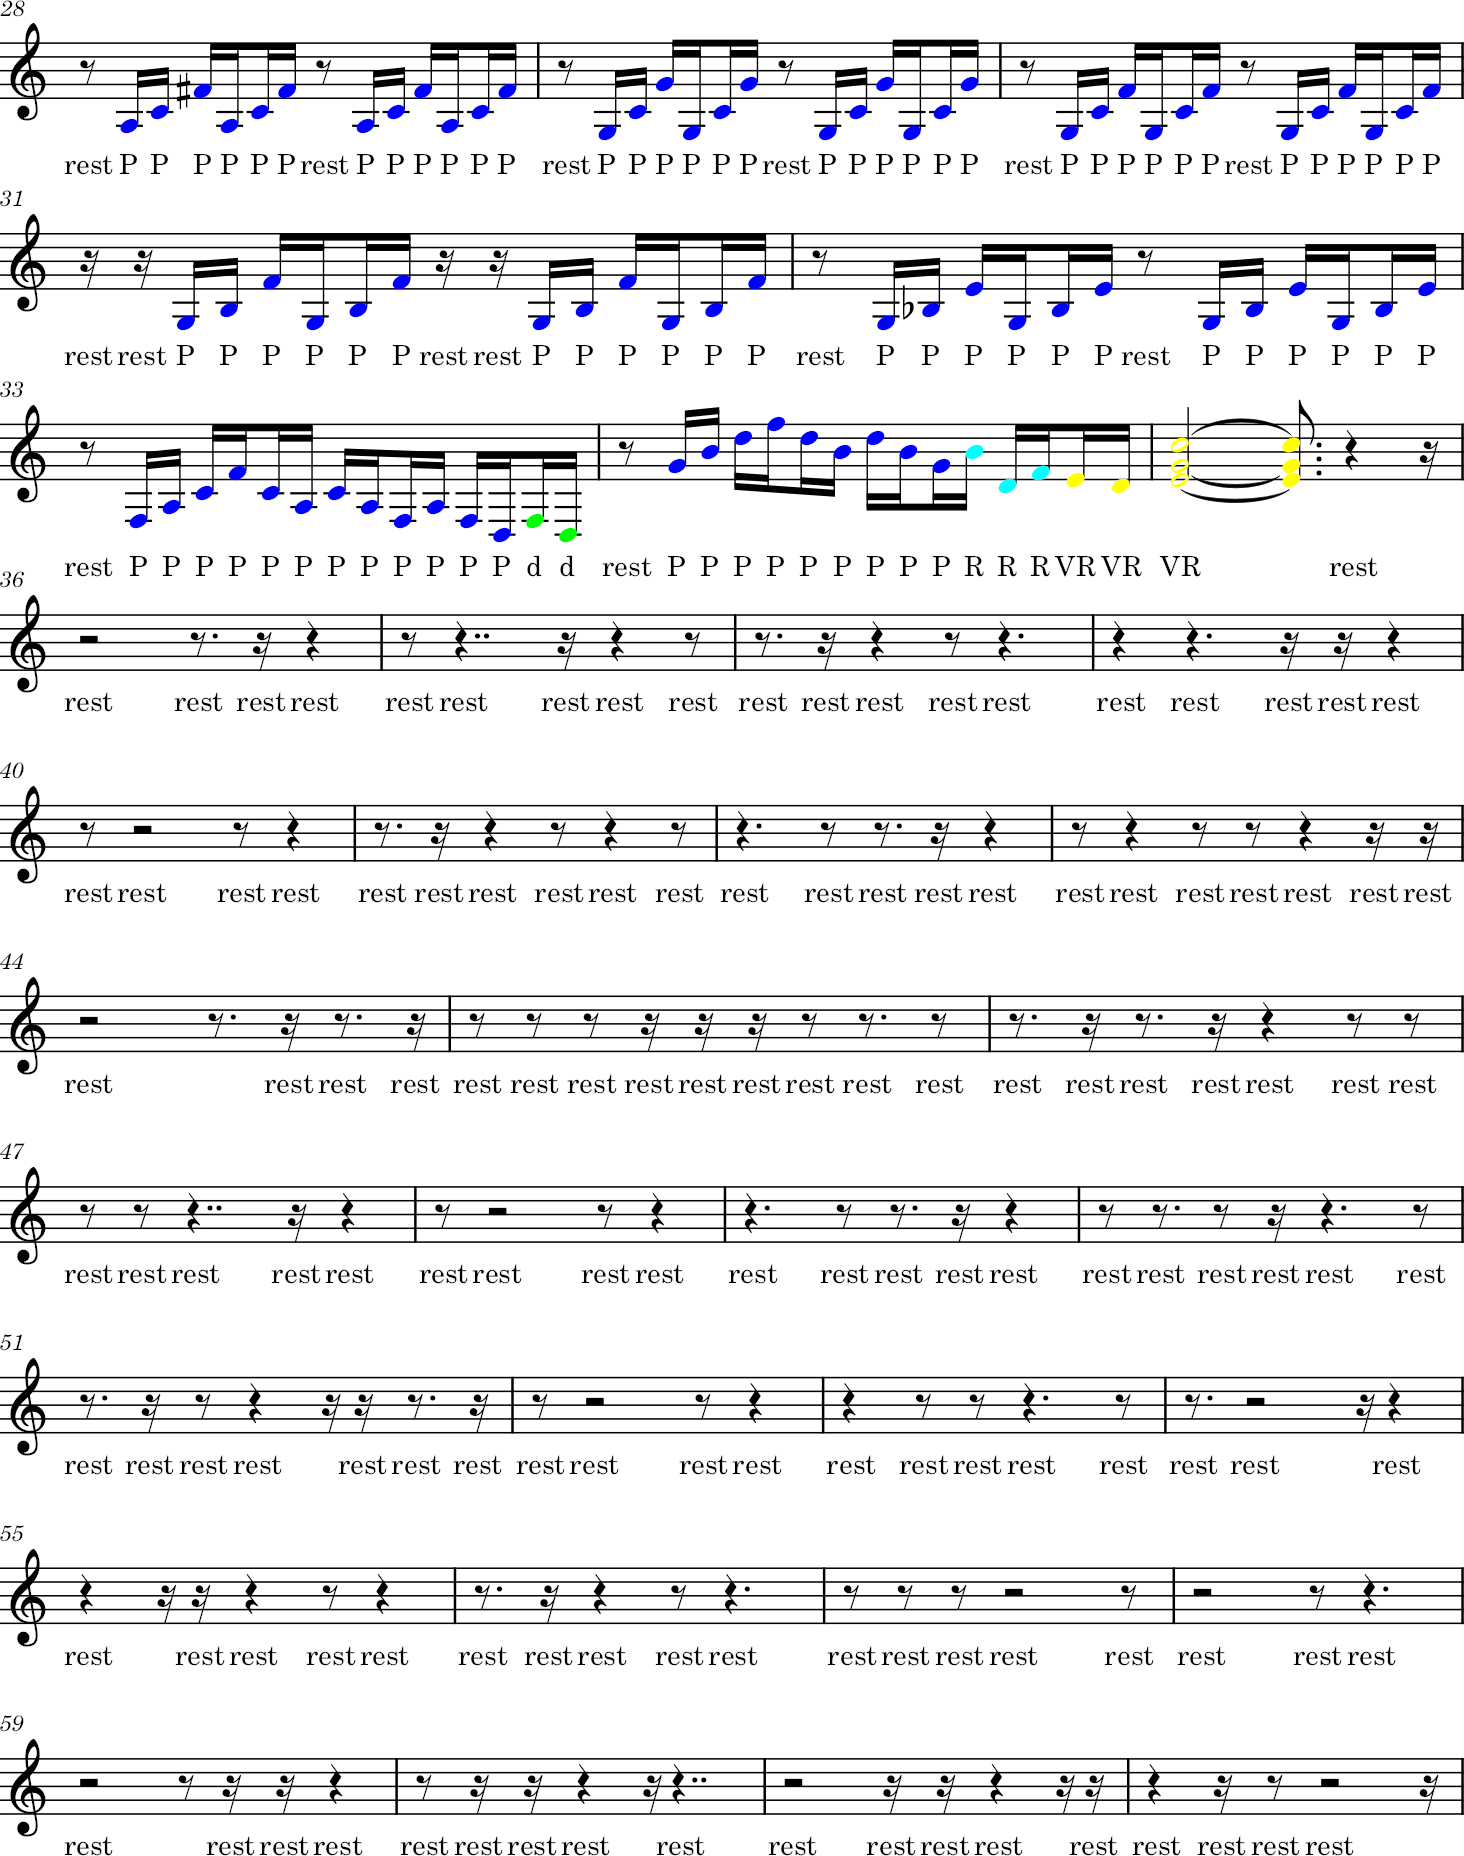

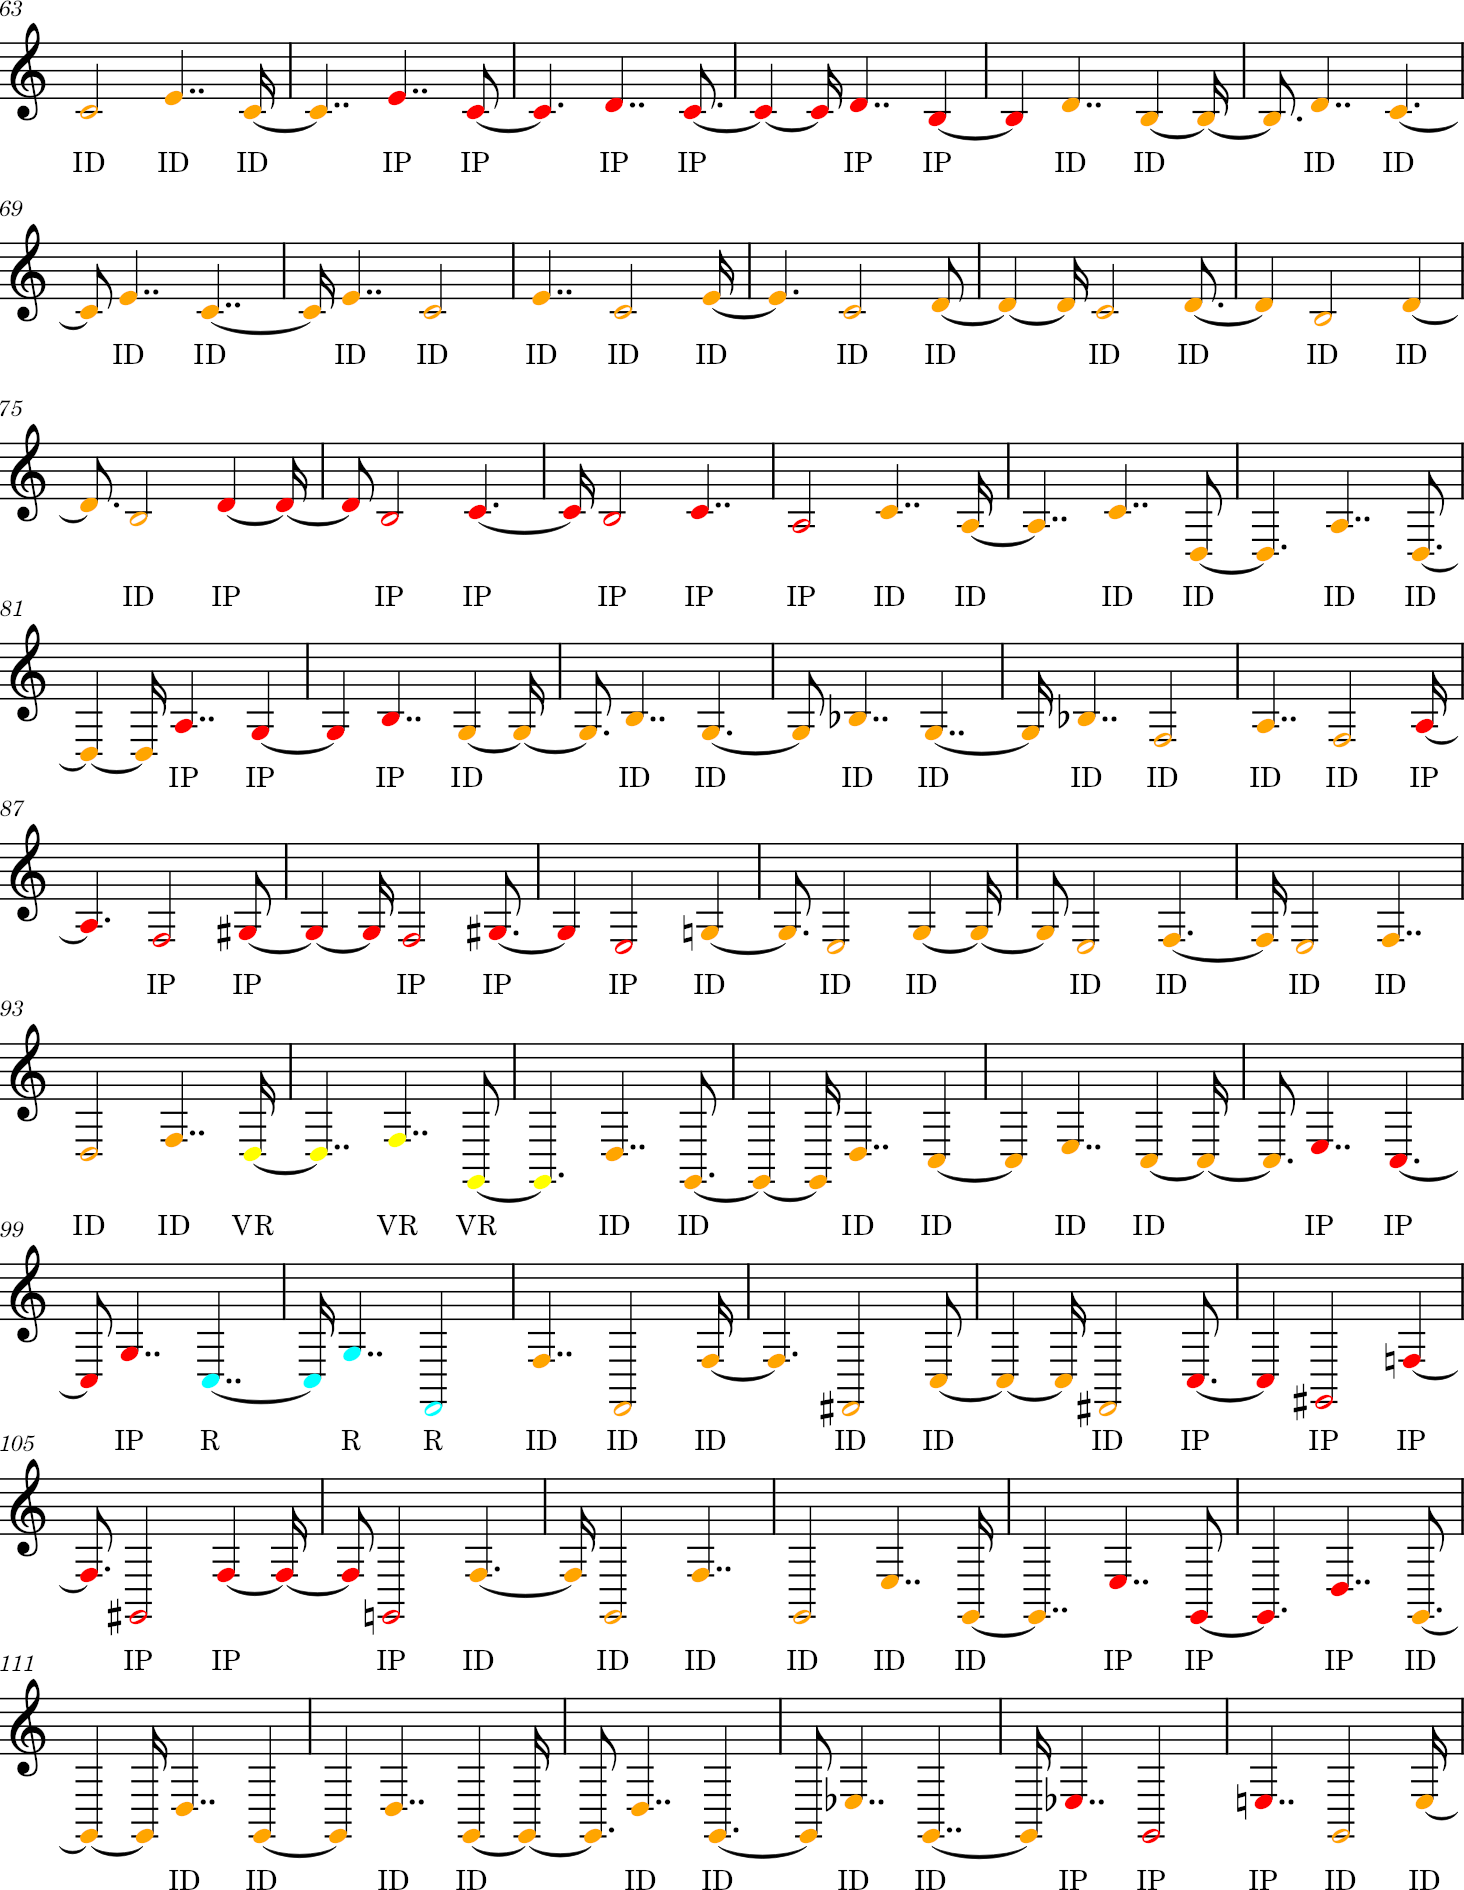

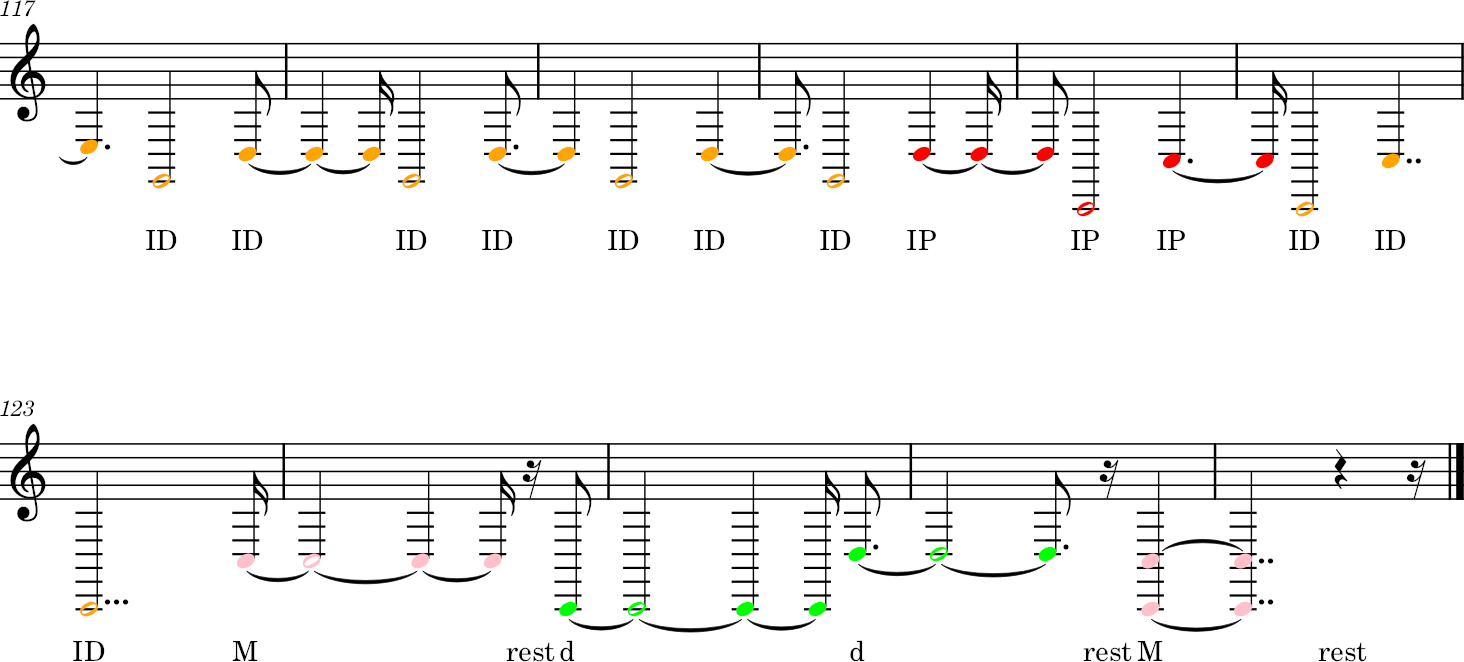

In [33]:
# TO BE REVISED TOMORROW START HERE

# Usage of the above functions
test_ir = assign_ir_symbols(narr)

# output narr to a readable .txt file
with open("test_ir_output.txt", "w") as f:
    f.write(f"Number of notes: {len(test_ir)}\n\n")
    for note in test_ir:
        f.write(f"{note}\n")

# try: # error when polyphonic
visualize_notes_with_symbols(test_ir)
# except:
#     score = converter.parse('bach_846.mid')
#     score.show

## Gestalt Based Segmentation (Functions)

In [35]:
# onset function
def get_onset(notematrix: pd.DataFrame, timetype='beat'):
  if timetype == 'beat':
    return notematrix['onset_beats']
  elif timetype == 'sec':
    return notematrix['onset_sec']
  else:
    ValueError(f"Invalid timetype: {timetype}. Choices are only 'beat' and 'sec'")

In [36]:
# duration function
def get_duration(notematrix: pd.DataFrame, timetype='beat') -> pd.Series:
  if timetype == 'beat':
    return notematrix['duration_beats']
  elif timetype == 'sec':
    return notematrix['duration_sec']
  else:
    ValueError(f"Invalid timetype: {timetype}. Choices are only 'beat' and 'sec'")

In [37]:
# clang boundary calculation funtion
def calculate_clang_boundaries(notematrix: pd.DataFrame):
  cl = 2*(get_onset(notematrix).diff() + get_duration(notematrix).shift(-1)) + abs(notematrix['midi_pitch'].diff())
  clb = (cl.shift(-1) > cl) & (cl.shift(1) > cl)
  clind = clb.index[clb].tolist()
  return clind

In [38]:
# segment boundary calculation function
def calculate_segment_boundaries(notematrix, clind):
    first = [0] + clind
    last = clind + [len(notematrix) - 1]
    mean_pitch = [notematrix.iloc[first[i]:last[i]+1]['midi_pitch'].mean() for i in range(len(first))]
    segdist = []
    for i in range(1, len(first)):
        segdist.append(abs(mean_pitch[i] - mean_pitch[i - 1]) +
                       notematrix.iloc[first[i]]['onset_beats'] - notematrix.iloc[last[i - 1]]['onset_beats'] +
                       notematrix.iloc[first[i]]['duration_beats'] + notematrix.iloc[first[i - 1]]['duration_beats'] +
                       2 * (notematrix.iloc[first[i]]['onset_beats'] - notematrix.iloc[last[i - 1]]['onset_beats']))

    segb = [(segdist[i] > segdist[i-1] and segdist[i] > segdist[i+1]) for i in range(1, len(segdist)-1)]
    segind = [clind[i] for i in range(1, len(segdist)-1) if segb[i-1]]
    return segind

In [40]:
# gestalt segmentation function
def segmentgestalt(notematrix):
    if notematrix.empty:
        return None

    # IR Assignment function here? <------------------------------------------------------ yayayaya look here
    clind = calculate_clang_boundaries(notematrix)
    segind = calculate_segment_boundaries(notematrix, clind)

    segments = []
    start_idx = 0
    for end_idx in segind:
        segments.append(notematrix.iloc[start_idx:end_idx+1])
        start_idx = end_idx + 1

    segments.append(notematrix.iloc[start_idx:])
    return segments

## Get Clang Boundaries and Segments

In [41]:
# show clang boundaries
clang_boundaries = calculate_clang_boundaries(nmat)
print("Clang Boundaries:", clang_boundaries)

Clang Boundaries: [3, 6, 10, 13, 17, 20, 24, 27, 31, 34, 38, 41, 45, 48, 52, 55, 59, 62, 66, 69, 72, 75, 79, 82, 87, 90, 94, 97, 100, 103, 107, 110, 114, 117, 121, 124, 128, 131, 135, 138, 143, 146, 150, 153, 156, 159, 163, 166, 169, 172, 175, 179, 182, 185, 188, 192, 195, 200, 203, 207, 210, 213, 216, 220, 223, 227, 230, 234, 237, 241, 244, 248, 251, 256, 259, 263, 266, 269, 272, 276, 279, 283, 286, 290, 293, 300, 307, 311, 314, 318, 321, 326, 329, 333, 336, 340, 343, 347, 350, 359, 364, 368, 371, 375, 378, 382, 385, 389, 392, 396, 399, 403, 406, 413, 423, 425, 428, 431, 433, 436, 440, 443, 447, 450, 455, 480, 484, 487, 489, 491, 493, 495, 497, 499, 502, 504, 509, 511, 513, 515, 517, 519, 522, 525, 527, 529, 533, 538, 540, 542, 547, 549, 551, 554, 556, 558, 563, 565, 568, 570, 573, 579, 582, 584, 586, 591, 593, 595, 597, 599, 602, 605, 607, 610, 614, 616, 618, 622, 625, 627, 629, 631, 633, 635, 637, 639, 641, 643, 645, 647, 649, 651, 653, 655, 657, 659, 663, 665, 667, 669, 671, 673, 6

In [47]:
# Label Segment with Song title, then output segments to a readable .txt file
labeled_segments = []
segments = segmentgestalt(nmat)
for segment in segments:
    labeled_segments.append((score_title, segment))

for idx, tuple in enumerate(labeled_segments):
    title, segment = tuple
    print(f"{title} Segment {idx+1}:")
    print(segment)
    print("----------------------")

    # output sarr to a readable .txt file
with open("sarr_output.txt", "w") as f:
    f.write(f"Number of elements: {len(sarr)}\n\n")
    for element in sarr:
        f.write(f"{element}\n")

bach_846 Segment 1:
   onset_beats duration_beats  midi_pitch
0          0.0            0.5         0.0
1          0.5           0.25        67.0
2         0.75           0.25        72.0
3          1.0           0.25        76.0
4         1.25           0.25        67.0
5          1.5           0.25        72.0
6         1.75           0.25        76.0
7          2.0            0.5         0.0
8          2.5           0.25        67.0
9         2.75           0.25        72.0
10         3.0           0.25        76.0
11        3.25           0.25        67.0
12         3.5           0.25        72.0
13        3.75           0.25        76.0
14         4.0            0.5         0.0
15         4.5           0.25        69.0
16        4.75           0.25        74.0
17         5.0           0.25        77.0
----------------------
bach_846 Segment 2:
   onset_beats duration_beats  midi_pitch
18        5.25           0.25        69.0
19         5.5           0.25        74.0
20        5.7

## DTW Distance Using TSLearn

In [ ]:
def segments_to_distance_matrix(segments: list[pd.DataFrame], cores=None):
    if __name__ == '__main__':
        
        if cores is not None and cores > cpu_count():
            raise ValueError(f"You don't have enough cores! Please specify a value within your system's number of cores. \n Core Count: {cpu_count()}")
        
        seg_np = [segment.to_numpy() for segment in segments]
    
        num_segments = len(seg_np)
        distance_matrix = np.zeros((num_segments, num_segments))
    
        # Create argument list for multiprocessing
        args_list = []
        for i in range(num_segments):
            for j in range(i + 1, num_segments):
                args_list.append((i, j, segments[i], segments[j]))
    
        with Manager() as manager:
            message_list = manager.list()
    
            def log_message(message):
                message_list.append(message)
    
            # Use multiprocessing Pool to parallelize the calculations
            with Pool() as pool:
                results = pool.map(worker.calculate_distance, args_list)
    
            # Update distance matrix with the results
            for i, j, distance, message in results:
                distance_matrix[i, j] = distance
                distance_matrix[j, i] = distance  # Reflect along the diagonal
                log_message(message)
    
            # Print messages from the shared list
            for message in message_list:
                print(message)
    
        return distance_matrix

In [ ]:
# segments to distance matrix
dist_mat = segments_to_distance_matrix(segments)

## Building the KNN Graph


In [ ]:
# building KNN Graph
k = 3
distance_matrix = dist_mat
knn_graph = kneighbors_graph(distance_matrix, n_neighbors=k, mode='connectivity')

G = nx.from_scipy_sparse_array(knn_graph)

# Detect if the graph is disjoint
if not nx.is_connected(G):
    print("The KNN graph is disjoint. Ensuring connectivity...")

    # Calculate the connected components
    components = list(nx.connected_components(G))

    # Connect the components
    for i in range(len(components) - 1):
        min_dist = np.inf
        closest_pair = None
        for node1 in components[i]:
            for node2 in components[i + 1]:
                dist = distance_matrix[node1, node2]
                if dist < min_dist:
                    min_dist = dist
                    closest_pair = (node1, node2)

        # Add an edge between the closest pair of nodes from different components
        G.add_edge(closest_pair[0], closest_pair[1])

# Plot the final connected graph
pos = nx.spring_layout(G, seed=42, iterations=50)
pos_dict = {i: pos[i] for i in range(len(pos))}
nx.draw(G, node_size=50, pos=pos_dict)
plt.title('Bach Prelude in C')
plt.show()

In [ ]:
# distance matrix to knn graph function
def distance_matrix_to_knn_graph(k: int, distance_matrix: np.array, graph_title: str,
                                 seed: int, iterations: int):
  knn_graph = kneighbors_graph(distance_matrix, n_neighbors=k, mode='connectivity')

  G = nx.from_scipy_sparse_array(knn_graph)

  # Detect if the graph is disjoint
  if not nx.is_connected(G):
      print("The KNN graph is disjoint. Ensuring connectivity...")

      # Calculate the connected components
      components = list(nx.connected_components(G))

      # Connect the components
      for i in range(len(components) - 1):
          min_dist = np.inf
          closest_pair = None
          for node1 in components[i]:
              for node2 in components[i + 1]:
                  dist = distance_matrix[node1, node2]
                  if dist < min_dist:
                      min_dist = dist
                      closest_pair = (node1, node2)

          # Add an edge between the closest pair of nodes from different components
          G.add_edge(closest_pair[0], closest_pair[1])

  # Plot the final connected graph
  pos = nx.spring_layout(G, seed=seed, iterations=iterations)
  nx.draw(G, node_size=50, pos=pos)
  plt.title(graph_title + f" (K={k})")
  plt.show()

In [ ]:
# show graph
distance_matrix_to_knn_graph(3, dist_mat, "Bach Prelude in C", 42, 50)

### Currently Trying to Put The Segment Data Into The Node so we can analyze grouped segments

In [ ]:
# segments to graph function
def segments_to_graph(k: int, segments: list[pd.DataFrame], cores=None):
  # Convert segments to a distance matrix
  distance_matrix = segments_to_distance_matrix(segments, cores=cores)

  # Compute the k-NN graph
  knn_graph = kneighbors_graph(distance_matrix, n_neighbors=k, mode='connectivity')

  # Convert the k-NN graph to a NetworkX graph
  G = nx.from_scipy_sparse_array(knn_graph)

  # Add segment data as attributes to each node
  for i in range(len(segments)):
    G.nodes[i]['segment'] = segments[i]

  # Detect if the graph is disjoint
  if not nx.is_connected(G):
      print("The KNN graph is disjoint. Ensuring connectivity...")

      # Calculate the connected components
      components = list(nx.connected_components(G))

      # Connect the components
      for i in range(len(components) - 1):
          min_dist = np.inf
          closest_pair = None
          for node1 in components[i]:
              for node2 in components[i + 1]:
                  dist = distance_matrix[node1, node2]
                  if dist < min_dist:
                      min_dist = dist
                      closest_pair = (node1, node2)

          # Add an edge between the closest pair of nodes from different components
          G.add_edge(closest_pair[0], closest_pair[1])

  return G, distance_matrix

In [ ]:
# segments to graph
graph, distance_matrix = segments_to_graph(5, segments)

## Trying to find ways to validate "Graph Identity"

besides average dtw distance Im trying to see if I can make something of a graph "silhouette score".

Basically get the communities in the graph then calculate the following:

* homogeneity: intra-cluster distance

* heterogeneity: inter-cluster distance

* "Graph Silhoette Score:" $\frac{Heterogeneity - Homogeneity} {max(Hetero, Homo)}$

Also might take a look at clustering coefficients

In [ ]:
# graph metrics function
def graph_metrics(graph: nx.classes.graph.Graph, distance_matrix: np.array,
                  seed: int):
  avg_dtw_distance = distance_matrix.mean()
  avg_clustering_coef = nx.average_clustering(graph)

  communities = nx.community.louvain_communities(graph, seed)

  silhouette_scores = []
  for cluster in communities:
    for i in cluster:
      cluster_distances = distance_matrix[i, list(cluster - {i})]
      homogeneity = np.mean(cluster_distances)
      other_cluster_distances = [np.mean(distance_matrix[i, list(other_cluster)]) for other_cluster in communities if other_cluster != cluster]
      heterogeneity = min(other_cluster_distances) if other_cluster_distances else homogeneity
      silhouette_score = (heterogeneity - homogeneity) / max(heterogeneity, homogeneity)
      silhouette_scores.append(silhouette_score)

  # Average silhouette score for all nodes
  average_silhouette_score = np.mean(silhouette_scores)

  conductance_scores = []
  for cluster in communities:
    cluster_conductance = conductance(graph, cluster)
    conductance_scores.append(cluster_conductance)

  average_conductance = np.mean(conductance_scores)

  print("Average DTW Distance:", avg_dtw_distance)
  print("Average Clustering Coefficient:", avg_clustering_coef)
  print("Average Silhouette Score", average_silhouette_score)
  print("Average Conductance:", average_conductance)

In [ ]:
# show graph metrics and segment data
graph_metrics(graph, distance_matrix, 42)
print(f"Graph Length: {len(graph)}")

for node in graph.nodes(data=True):
  node_id = node[0]
  segment_data = node[1]['segment']
  print(f"Node {node_id} segment data:")
  print(segment_data)

In [ ]:
# plot graph function
def plot_graph(graph: nx.classes.graph.Graph,
               seed: int,
               iterations: int,
               title: str,
               node_size: int):
  pos = nx.spring_layout(graph, seed=seed, iterations=iterations)
  nx.draw(G, node_size=node_size, pos=pos)
  plt.title(title)
  plt.show()

In [ ]:
# show graph
plot_graph(graph, 3, 50, "Bach Prelud in C (K=5)", 50)

In [ ]:
for i in range(len(graph.nodes())):
  graph.nodes[i]['segment'] = graph.nodes[i]['segment'].to_json(default_handler=str)

nt = Network('1000px', '1000px', notebook=True, cdn_resources = 'remote')
nt.from_nx(graph)
nt.show('sample_graph.html')   ### Still need to figure out the labels
display(HTML('sample_graph.html'))